In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("results.csv")
df = df.drop("Unnamed: 0", axis=1)

In [4]:
pbp = df.loc[df["Feature"] == "Pixel By Pixel"]
lbp = df.loc[(df["Feature"] == "LBP") & (df["Unifrom"] == False)]
lbp_u = df.loc[(df["Feature"] == "LBP") & (df["Unifrom"] == True)]

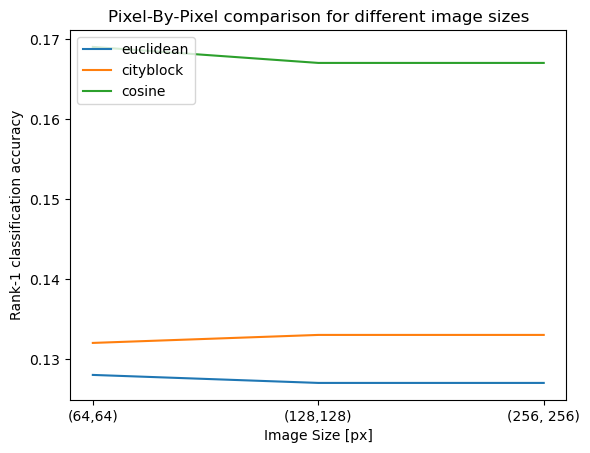

In [15]:
plt.plot(pbp.loc[pbp["Metric"] == "euclidean"]["Result"].values)
plt.plot(pbp.loc[pbp["Metric"] == "cityblock"]["Result"].values)
plt.plot(pbp.loc[pbp["Metric"] == "cosine"]["Result"].values)
plt.legend(["euclidean", "cityblock", "cosine"], loc ="upper left")
plt.title("Pixel-By-Pixel comparison for different image sizes")
plt.xticks([0,1,2], ["(64,64)","(128,128)","(256, 256)"])
plt.xlabel("Image Size [px]")
plt.ylabel("Rank-1 classification accuracy")
plt.show()


In [16]:
df_correct = lbp.loc[lbp["Metric"] == "euclidean"].groupby('Image Size')['Result'].apply(lambda x: (x >= 0.127).sum()).reset_index(name='count')
df_false = lbp.loc[lbp["Metric"] == "euclidean"].groupby('Image Size')['Result'].apply(lambda x: (x < 0.127).sum()).reset_index(name='count')

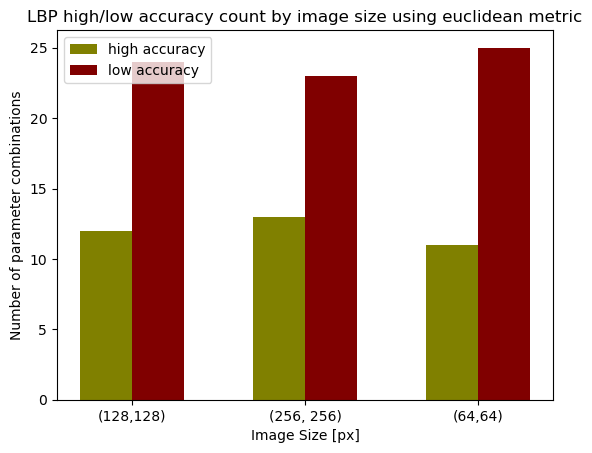

In [17]:
plt.bar([1,2,3], df_correct["count"].values, width=0.3, color="olive")
plt.bar(np.array([1,2,3]) + 0.3, df_false["count"].values, width=0.3, color="maroon")
plt.xticks([1.15,2.15,3.15], ["(128,128)","(256, 256)","(64,64)"])
plt.legend(["high accuracy", "low accuracy"], loc="upper left")
plt.title("LBP high/low accuracy count by image size using euclidean metric")
plt.xlabel("Image Size [px]")
plt.ylabel("Number of parameter combinations")
plt.show()

In [18]:
df_euc= lbp.loc[lbp["Metric"] == "euclidean"]

In [19]:
res1 = df_euc.groupby('Histogram').agg({'Result': ['mean', 'std']})
res1 = res1.xs('Result', axis=1, drop_level=True)

In [20]:
res2 = df_euc.groupby('R').agg({'Result': ['mean', 'std']})
res2 = res2.xs('Result', axis=1, drop_level=True)

In [21]:
res3 = df_euc.groupby('Histogram Tile Size').agg({'Result': ['mean', 'std']})
res3 = res3.xs('Result', axis=1, drop_level=True)

In [22]:
res4 = df_euc.groupby('Image Size').agg({'Result': ['mean', 'std']})
res4 = res4.xs('Result', axis=1, drop_level=True)

In [15]:
df_comp= df[df["Result"] >= df["Skimage"]]

In [18]:
df_comp


,Feature,Unifrom,Metric,Result,Skimage,Image Size,R,L,Step,Histogram,Histogram Tile Size
9,LBP,False,euclidean,0.288,0.243,"(64, 64)",1.0,8.0,1.0,False,NaN
10,LBP,False,cityblock,0.308,0.305,"(64, 64)",1.0,8.0,1.0,False,NaN
11,LBP,False,cosine,0.175,0.166,"(64, 64)",1.0,8.0,1.0,False,NaN
13,LBP,False,cityblock,0.310,0.302,"(64, 64)",1.0,8.0,1.0,True,16.0
14,LBP,False,cosine,0.252,0.222,"(64, 64)",1.0,8.0,1.0,True,16.0
...,...,...,...,...,...,...,...,...,...,...,...
627,LBP,True,euclidean,0.118,0.103,"(256, 256)",3.0,32.0,1.0,True,32.0
628,LBP,True,cityblock,0.153,0.135,"(256, 256)",3.0,32.0,1.0,True,32.0
629,LBP,True,cosine,0.138,0.104,"(256, 256)",3.0,32.0,1.0,True,32.0
630,LBP,True,euclidean,0.077,0.072,"(256, 256)",3.0,32.0,1.0,True,64.0


In [23]:
df[~df['Skimage'].isnull()]

,Feature,Unifrom,Metric,Result,Skimage,Image Size,R,L,Step,Histogram,Histogram Tile Size
9,LBP,False,euclidean,0.288,0.243,"(64, 64)",1.0,8.0,1.0,False,NaN
10,LBP,False,cityblock,0.308,0.305,"(64, 64)",1.0,8.0,1.0,False,NaN
11,LBP,False,cosine,0.175,0.166,"(64, 64)",1.0,8.0,1.0,False,NaN
12,LBP,False,euclidean,0.210,0.211,"(64, 64)",1.0,8.0,1.0,True,16.0
13,LBP,False,cityblock,0.310,0.302,"(64, 64)",1.0,8.0,1.0,True,16.0
...,...,...,...,...,...,...,...,...,...,...,...
628,LBP,True,cityblock,0.153,0.135,"(256, 256)",3.0,32.0,1.0,True,32.0
629,LBP,True,cosine,0.138,0.104,"(256, 256)",3.0,32.0,1.0,True,32.0
630,LBP,True,euclidean,0.077,0.072,"(256, 256)",3.0,32.0,1.0,True,64.0
631,LBP,True,cityblock,0.087,0.092,"(256, 256)",3.0,32.0,1.0,True,64.0
